# Create a simple NN with Keras

In [118]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

df.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
df.columns

Index(['timespreg', 'gluctol', 'diaspb', 'triceps', 'insulin', 'massindex',
       'pedigree', 'age', 'target'],
      dtype='object')

In [120]:
#Print class frequencies through pandas 
print(df.groupby('target').size())

target
0    500
1    268
dtype: int64


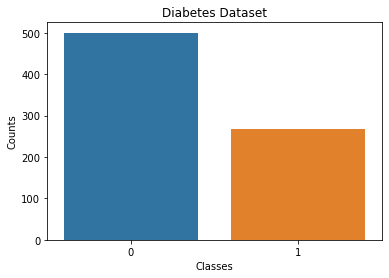

In [121]:
#Bar plot for the target variable
%matplotlib inline
import seaborn as sns #https://seaborn.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/

sns.countplot(x="target", data=df)
plt.title("Diabetes Dataset")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

array([[<AxesSubplot:title={'center':'timespreg'}>,
        <AxesSubplot:title={'center':'gluctol'}>,
        <AxesSubplot:title={'center':'diaspb'}>],
       [<AxesSubplot:title={'center':'triceps'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'massindex'}>],
       [<AxesSubplot:title={'center':'pedigree'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

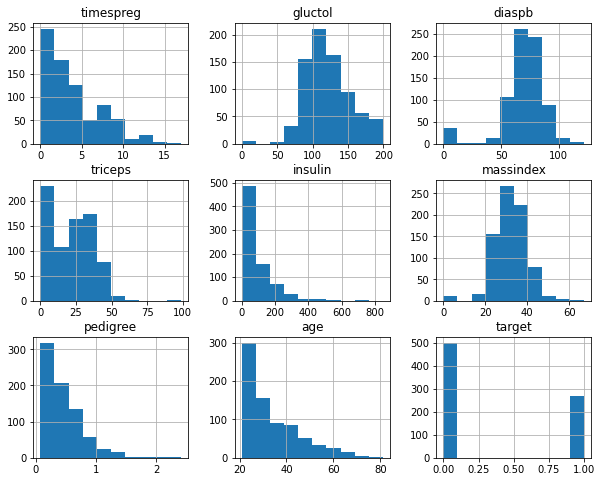

In [122]:
df.hist(figsize=(10,8))

In [123]:
# slicing the dataframe EXPL_VARs/TARGET
import numpy as np
df = df.values
x=df[:,0:-1] 
y=df[:,-1]

print(x.shape)

(768, 8)


In [124]:
print(y.shape)

(768,)


In [125]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.3, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


## Create a NN model with Keras

In [126]:
# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} keras tensorflow

In [236]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

np.random.seed(123)

model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Train the model and print a summary representation of the model

In [237]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 6         
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
None


# Fit the model

In [238]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100,
                    batch_size=32)

Epoch 1/100
14/14 [==============================] - 1s 29ms/step - loss: 12.8690 - accuracy: 0.6164 - val_loss: 7.7460 - val_accuracy: 0.5000
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 11.5698 - accuracy: 0.6092 - val_loss: 6.8071 - val_accuracy: 0.5093
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 8.8584 - accuracy: 0.6088 - val_loss: 6.0820 - val_accuracy: 0.4722
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 8.8420 - accuracy: 0.5475 - val_loss: 5.5762 - val_accuracy: 0.4537
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 7.5463 - accuracy: 0.5890 - val_loss: 5.0581 - val_accuracy: 0.4537
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 7.5345 - accuracy: 0.5818 - val_loss: 4.2271 - val_accuracy: 0.4815
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 6.1896 - accuracy: 0.6070 - val_loss: 3.6996 - val_accuracy: 0.4815
Epoc

14/14 [==============================] - 0s 20ms/step - loss: 0.6416 - accuracy: 0.6851 - val_loss: 0.8299 - val_accuracy: 0.5741
Epoch 59/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6546 - accuracy: 0.6618 - val_loss: 0.8402 - val_accuracy: 0.5741
Epoch 60/100
14/14 [==============================] - 0s 14ms/step - loss: 0.6825 - accuracy: 0.6722 - val_loss: 0.8226 - val_accuracy: 0.5648
Epoch 61/100
14/14 [==============================] - 0s 12ms/step - loss: 0.6888 - accuracy: 0.6055 - val_loss: 0.8246 - val_accuracy: 0.5741
Epoch 62/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6672 - accuracy: 0.6655 - val_loss: 0.8279 - val_accuracy: 0.5463
Epoch 63/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6855 - accuracy: 0.6672 - val_loss: 0.8298 - val_accuracy: 0.5463
Epoch 64/100
14/14 [==============================] - 0s 12ms/step - loss: 0.6404 - accuracy: 0.6958 - val_loss: 0.8263 - val_accuracy: 0.5463
Epoch 65/100

# Evaluate the model and print its loss and accuracy score

In [239]:
score = model.evaluate(x_test, y_test)
print(score)

8/8 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.6667
[0.6220503449440002, 0.6666666865348816]


In [240]:
y_pred_prob=model.predict(x_test)
y_pred_prob

array([[5.78917563e-02],
       [3.21649730e-01],
       [3.20019811e-01],
       [3.74809206e-01],
       [3.27231646e-01],
       [3.35917830e-01],
       [3.35917830e-01],
       [2.19301939e-01],
       [3.14155757e-01],
       [3.74149680e-01],
       [3.74149680e-01],
       [3.16574216e-01],
       [3.14774334e-01],
       [3.74149680e-01],
       [3.28844339e-01],
       [3.74149680e-01],
       [3.74149680e-01],
       [3.27583462e-01],
       [3.74149680e-01],
       [3.35917830e-01],
       [4.80124503e-01],
       [3.17881167e-01],
       [3.74149680e-01],
       [3.25083733e-01],
       [3.74149680e-01],
       [5.06732345e-01],
       [3.40869904e-01],
       [3.35917830e-01],
       [3.35917830e-01],
       [4.92884308e-01],
       [4.28085208e-01],
       [3.32277417e-01],
       [3.74149680e-01],
       [3.74149680e-01],
       [3.25207680e-01],
       [4.26412880e-01],
       [6.08218133e-01],
       [5.82943916e-01],
       [3.23572308e-01],
       [3.74149680e-01],


              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77       150
         1.0       0.56      0.36      0.44        81

    accuracy                           0.68       231
   macro avg       0.63      0.60      0.60       231
weighted avg       0.66      0.68      0.65       231



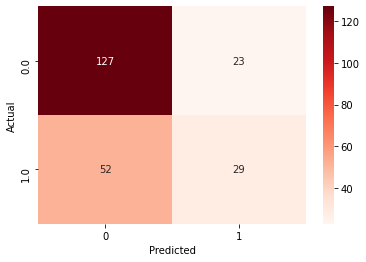

In [241]:
y_pred=np.where(y_pred_prob > .38, 1,0).flatten()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd

print(classification_report(y_test, y_pred))

confusion_matrix = pd.crosstab( y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='g',cmap="Reds")
plt.show()

# Plot model training history

In [242]:
history.history

{'loss': [13.21515941619873,
  11.41639232635498,
  10.060392379760742,
  9.451117515563965,
  7.611924648284912,
  7.7270355224609375,
  5.682855606079102,
  6.145667552947998,
  4.601775169372559,
  4.3565216064453125,
  4.257549285888672,
  3.787644624710083,
  3.5406527519226074,
  2.8757264614105225,
  2.5650691986083984,
  2.8643429279327393,
  2.201201915740967,
  1.9308127164840698,
  1.682616949081421,
  1.7901750802993774,
  1.4002773761749268,
  1.1350003480911255,
  1.6331720352172852,
  1.0636985301971436,
  1.2303547859191895,
  1.123225212097168,
  0.9525594115257263,
  1.0604822635650635,
  0.8206379413604736,
  0.8399175405502319,
  0.884043276309967,
  0.8918362259864807,
  0.8826116323471069,
  0.8600184917449951,
  0.8116549253463745,
  0.8037900924682617,
  0.7675302028656006,
  0.728190541267395,
  0.81424880027771,
  0.6737480759620667,
  0.7048655152320862,
  0.7933427691459656,
  0.7028746604919434,
  0.7113060355186462,
  0.7060962915420532,
  0.68972414731979

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


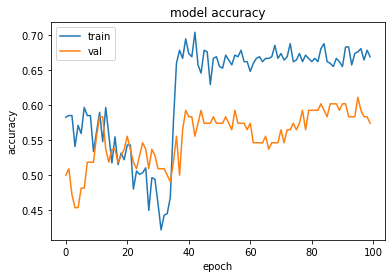

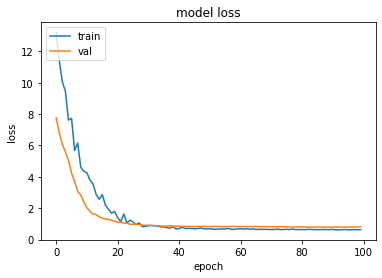

In [243]:
import matplotlib.pyplot as plt

%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()